In [2]:
import pandas as pd
cybersecurity = pd.read_csv('../ai_ml_cybersecurity_dataset.csv/ai_ml_cybersecurity_dataset.csv')

In [3]:
cybersecurity['Attack Type'].unique()

array(['Ransomware', 'Malware', 'DDoS', 'Insider Threat', 'Phishing'],
      dtype=object)

## Import all necessary packages

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [5]:
cybersecurity.head(5)

,Event ID,Timestamp,Source IP,Destination IP,User Agent,Attack Type,Attack Severity,Data Exfiltrated,Threat Intelligence,Response Action
0,2019969e-ecfa-41c4-b681-9b684bc3b3bf,2020-02-07 23:46:57,219.80.193.15,44.155.75.24,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...,Ransomware,Critical,False,Crime low this behind option tax product.,Eradicated
1,1668e954-781f-4731-94dc-24218b983ba1,2021-05-25 19:03:44,110.155.68.245,178.123.150.38,Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...,Malware,Critical,True,Responsibility work way effect.,Eradicated
2,0ef24a20-1d25-41fa-81b8-e19fb63e9e4c,2022-01-04 09:08:07,171.153.115.83,76.187.142.133,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...,Ransomware,High,False,Artist though type imagine food push.,Eradicated
3,073b6225-0998-488c-aa1c-23e49814b6ff,2022-10-12 19:48:43,29.49.228.195,89.39.7.177,Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...,DDoS,Critical,False,In still military despite TV look.,Contained
4,783fd153-6b88-44c1-8db5-d882300088cc,2021-11-24 02:04:33,120.43.64.52,113.82.34.164,Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...,Malware,Medium,False,Push always least police it range either.,Eradicated


In [6]:
#Check if there are any null values in the dataset
cybersecurity.isnull().any(axis = 1).sum()

0

In [7]:
# Count the occurrences of each unique value in a specific column
value_counts = cybersecurity['Source IP'].value_counts()
print(value_counts)

Source IP
219.80.193.15      1
220.200.106.63     1
94.213.115.245     1
210.80.170.163     1
151.60.81.237      1
                  ..
62.86.75.81        1
141.173.236.171    1
134.252.95.134     1
89.174.101.2       1
62.221.185.243     1
Name: count, Length: 20000, dtype: int64


In [8]:
# Count the occurrences of each unique value in a specific column
value_counts = cybersecurity['User Agent'].value_counts()
print(value_counts)

User Agent
Mozilla/5.0 (compatible; MSIE 8.0; Windows 98; Trident/5.1)                                                                                         19
Mozilla/5.0 (compatible; MSIE 8.0; Windows 98; Win 9x 4.90; Trident/4.1)                                                                            19
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.1; Trident/4.0)                                                                                     19
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 4.0; Trident/3.0)                                                                                     19
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/5.1)                                                                                         18
                                                                                                                                                    ..
Opera/9.89.(Windows NT 6.1; eo-US) Presto/2.9.171 Version/11.00                    

In [9]:
listUserAgent = cybersecurity['User Agent'].unique().tolist()
#listUserAgent

## Graph of Attack Type

In [10]:
#Create a dataframe containing the Attack type
attackType = cybersecurity[['Attack Type']]

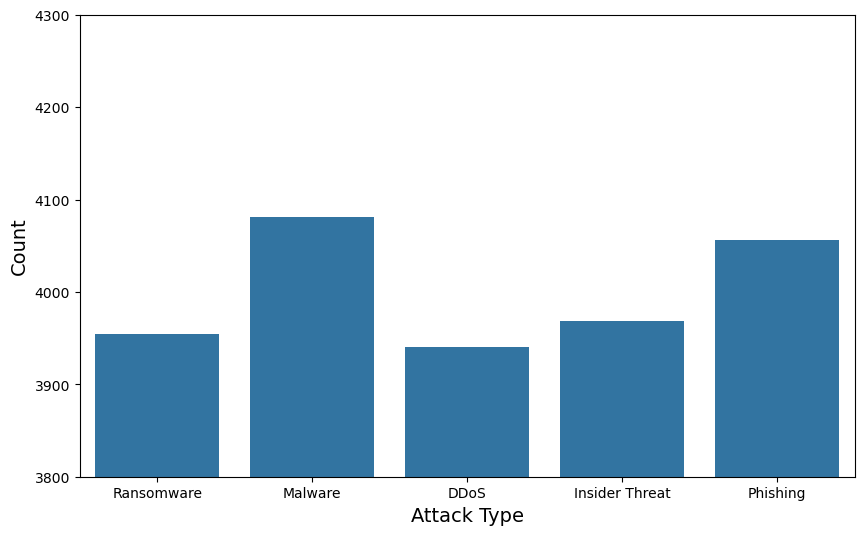

In [11]:
#Construct the count plot to show the frequency of each Attack type 
plt.figure(figsize=(10, 6))
p = sns.countplot(data=attackType, x='Attack Type')
p.set_xlabel('Attack Type', fontsize=14)
p.set_ylabel('Count', fontsize=14)
plt.ylim(3800, 4300)

plt.show()

## Graphs of Attack Severity

In [12]:
#Create a dataframe containing the Attack Severity
attackSeverity = cybersecurity[['Attack Severity']]

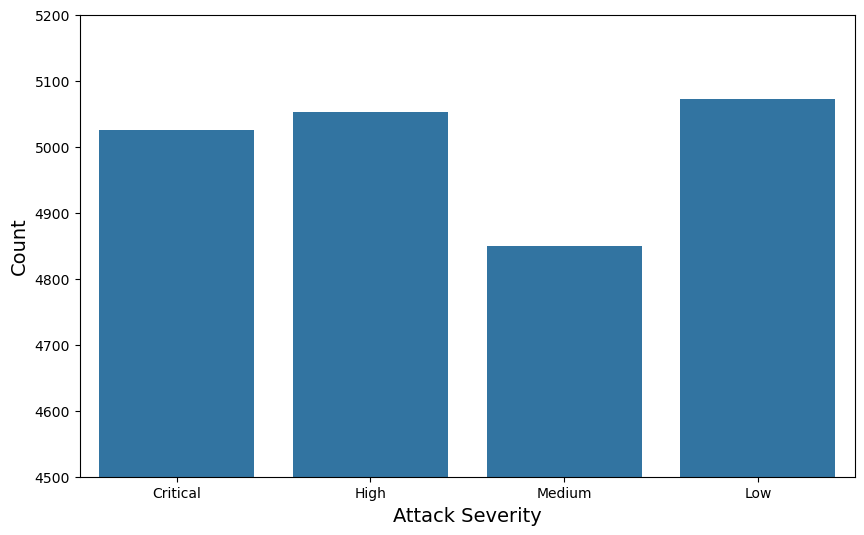

In [13]:
#Construct the count plot to show the frequency of each attack severity level
plt.figure(figsize=(10, 6))
p = sns.countplot(data=attackSeverity, x='Attack Severity')
p.set_xlabel('Attack Severity', fontsize=14)
p.set_ylabel('Count', fontsize=14)
plt.ylim(4500, 5200)

plt.show()

## Graph of Response Actions

In [14]:
#Create a dataframe containing the Response Action
responseAction = cybersecurity[['Response Action']]

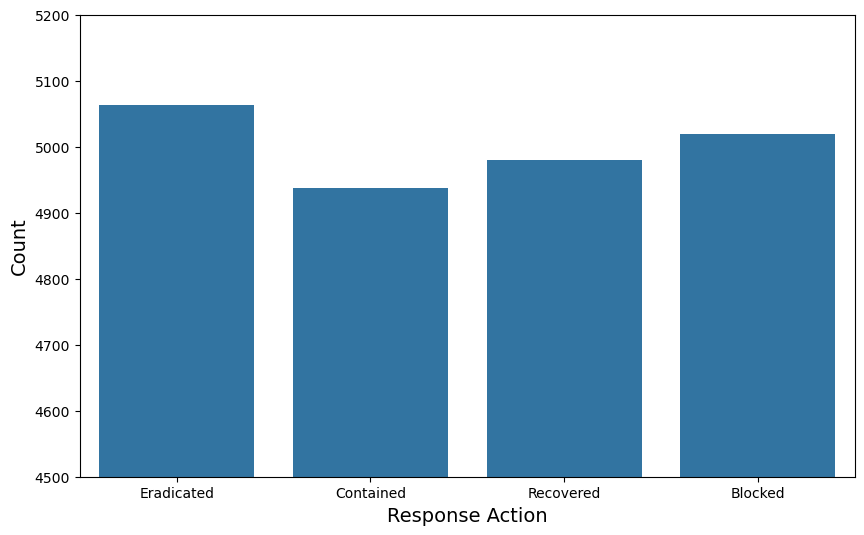

In [15]:
#Construct the count plot to show the frequency of each attack severity level
plt.figure(figsize=(10, 6))
p = sns.countplot(data=responseAction,  x='Response Action')
p.set_xlabel('Response Action', fontsize=14)
p.set_ylabel('Count', fontsize=14)
plt.ylim(4500, 5200)

plt.show()

## Graph to show the trend in number of attacks from 2020 to 2024

In [16]:
cybersecurity.head(1)

,Event ID,Timestamp,Source IP,Destination IP,User Agent,Attack Type,Attack Severity,Data Exfiltrated,Threat Intelligence,Response Action
0,2019969e-ecfa-41c4-b681-9b684bc3b3bf,2020-02-07 23:46:57,219.80.193.15,44.155.75.24,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...,Ransomware,Critical,False,Crime low this behind option tax product.,Eradicated


In [17]:
# Convert the 'Timestamp' column to pandas datetime format
cybersecurity['Timestamp'] = pd.to_datetime(cybersecurity['Timestamp'])

# Extract the date (or month and year) for aggregation
#code extracted from GPT
cybersecurity['YearMonth'] = cybersecurity['Timestamp'].dt.to_period('M')  # Monthly aggregation

In [18]:
# Group by YearMonth to count the number of attacks per month
monthly_attacks = cybersecurity.groupby('YearMonth').size().reset_index(name='Attack Count')

# Convert to datetime format for plotting
monthly_attacks['YearMonth'] = monthly_attacks['YearMonth'].dt.to_timestamp()

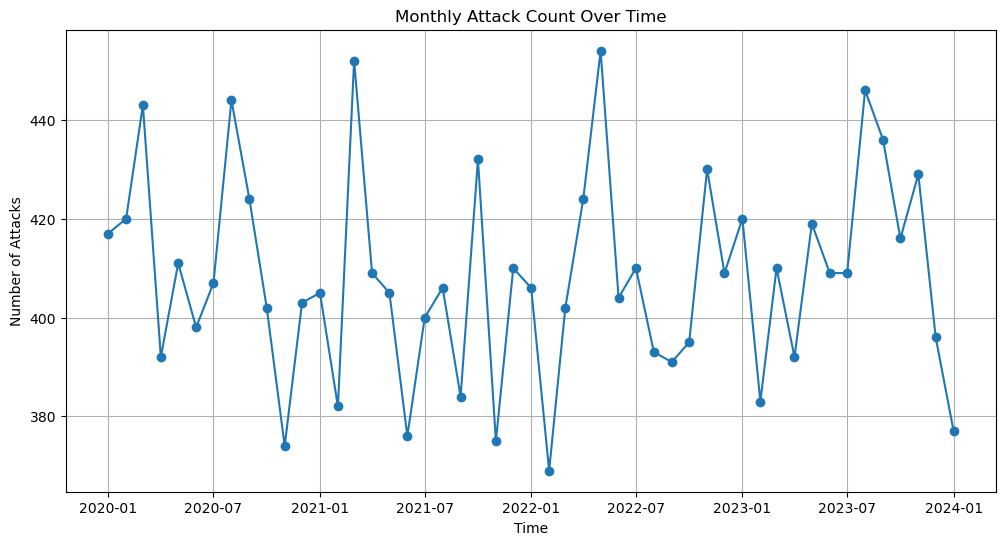

In [19]:
import matplotlib.pyplot as plt

# Plot the number of attacks over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_attacks['YearMonth'], monthly_attacks['Attack Count'], marker='o')
plt.title('Monthly Attack Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Attacks')
plt.grid()
plt.show()

In [20]:
cybersecurity.head(1)

,Event ID,Timestamp,Source IP,Destination IP,User Agent,Attack Type,Attack Severity,Data Exfiltrated,Threat Intelligence,Response Action,YearMonth
0,2019969e-ecfa-41c4-b681-9b684bc3b3bf,2020-02-07 23:46:57,219.80.193.15,44.155.75.24,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...,Ransomware,Critical,False,Crime low this behind option tax product.,Eradicated,2020-02


## Decision Tree to predict Response Action

In [21]:
cybersecurity.head(1)

,Event ID,Timestamp,Source IP,Destination IP,User Agent,Attack Type,Attack Severity,Data Exfiltrated,Threat Intelligence,Response Action,YearMonth
0,2019969e-ecfa-41c4-b681-9b684bc3b3bf,2020-02-07 23:46:57,219.80.193.15,44.155.75.24,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...,Ransomware,Critical,False,Crime low this behind option tax product.,Eradicated,2020-02


In [22]:
#subsetting the data by dropping multiple columns and keeping 'Attack Type', 'Attack Severity', 'Response Action', 'Data Exfiltrated'
treeData = cybersecurity[['Event ID', 'Attack Severity', 'Response Action', 'Data Exfiltrated']].copy()

In [23]:
treeData['Attack Severity'].unique()

array(['Critical', 'High', 'Medium', 'Low'], dtype=object)

In [24]:
treeData['Response Action'].unique()

array(['Eradicated', 'Contained', 'Recovered', 'Blocked'], dtype=object)

In [25]:
cybersecurity['Attack Type'].unique()

array(['Ransomware', 'Malware', 'DDoS', 'Insider Threat', 'Phishing'],
      dtype=object)

In [26]:
#transforming the ordinal data into numerical format
from sklearn.preprocessing import OrdinalEncoder
ordEncoder = OrdinalEncoder(categories = [['Recovered','Contained','Blocked','Eradicated']])
treeData['Response Action'] = ordEncoder.fit_transform(treeData[['Response Action']])
treeData.head()

,Event ID,Attack Severity,Response Action,Data Exfiltrated
0,2019969e-ecfa-41c4-b681-9b684bc3b3bf,Critical,3.0,False
1,1668e954-781f-4731-94dc-24218b983ba1,Critical,3.0,True
2,0ef24a20-1d25-41fa-81b8-e19fb63e9e4c,High,3.0,False
3,073b6225-0998-488c-aa1c-23e49814b6ff,Critical,1.0,False
4,783fd153-6b88-44c1-8db5-d882300088cc,Medium,3.0,False


In [27]:
#transforming the ordinal data into numerical format
ordEncodersev = OrdinalEncoder(categories = [['Low','Medium','High','Critical']])
treeData['Attack Severity'] = ordEncodersev.fit_transform(treeData[['Attack Severity']])
treeData.head()

,Event ID,Attack Severity,Response Action,Data Exfiltrated
0,2019969e-ecfa-41c4-b681-9b684bc3b3bf,3.0,3.0,False
1,1668e954-781f-4731-94dc-24218b983ba1,3.0,3.0,True
2,0ef24a20-1d25-41fa-81b8-e19fb63e9e4c,2.0,3.0,False
3,073b6225-0998-488c-aa1c-23e49814b6ff,3.0,1.0,False
4,783fd153-6b88-44c1-8db5-d882300088cc,1.0,3.0,False


In [28]:
cybersecurity.head(2)

,Event ID,Timestamp,Source IP,Destination IP,User Agent,Attack Type,Attack Severity,Data Exfiltrated,Threat Intelligence,Response Action,YearMonth
0,2019969e-ecfa-41c4-b681-9b684bc3b3bf,2020-02-07 23:46:57,219.80.193.15,44.155.75.24,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...,Ransomware,Critical,False,Crime low this behind option tax product.,Eradicated,2020-02
1,1668e954-781f-4731-94dc-24218b983ba1,2021-05-25 19:03:44,110.155.68.245,178.123.150.38,Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...,Malware,Critical,True,Responsibility work way effect.,Eradicated,2021-05


In [29]:
data = pd.get_dummies(cybersecurity[['Attack Type']].copy())
data = data * 1
data.columns =['DDoS','Insider Threat','Malware','Phishing','Ransomware']
data['Event ID'] = cybersecurity[['Event ID']].copy()
data.head()

,DDoS,Insider Threat,Malware,Phishing,Ransomware,Event ID
0,0,0,0,0,1,2019969e-ecfa-41c4-b681-9b684bc3b3bf
1,0,0,1,0,0,1668e954-781f-4731-94dc-24218b983ba1
2,0,0,0,0,1,0ef24a20-1d25-41fa-81b8-e19fb63e9e4c
3,1,0,0,0,0,073b6225-0998-488c-aa1c-23e49814b6ff
4,0,0,1,0,0,783fd153-6b88-44c1-8db5-d882300088cc


In [30]:
treeData = treeData.merge(data)
treeData.head(2)

,Event ID,Attack Severity,Response Action,Data Exfiltrated,DDoS,Insider Threat,Malware,Phishing,Ransomware
0,2019969e-ecfa-41c4-b681-9b684bc3b3bf,3.0,3.0,False,0,0,0,0,1
1,1668e954-781f-4731-94dc-24218b983ba1,3.0,3.0,True,0,0,1,0,0


In [31]:
#conversion of float to integers
columns_to_convert = ['Attack Severity', 'Response Action']
treeData[columns_to_convert] = treeData[columns_to_convert].astype(int)

In [32]:
treeData

,Event ID,Attack Severity,Response Action,Data Exfiltrated,DDoS,Insider Threat,Malware,Phishing,Ransomware
0,2019969e-ecfa-41c4-b681-9b684bc3b3bf,3,3,False,0,0,0,0,1
1,1668e954-781f-4731-94dc-24218b983ba1,3,3,True,0,0,1,0,0
2,0ef24a20-1d25-41fa-81b8-e19fb63e9e4c,2,3,False,0,0,0,0,1
3,073b6225-0998-488c-aa1c-23e49814b6ff,3,1,False,1,0,0,0,0
4,783fd153-6b88-44c1-8db5-d882300088cc,1,3,False,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
19995,34e609d3-ce8e-49f3-a552-776496bd0eab,3,0,False,0,0,0,0,1
19996,ab090f66-e2ba-4560-ab18-254e91bd042d,0,3,True,0,0,0,0,1
19997,387ec9f5-e808-4753-84bb-deeaf679d592,1,1,False,0,0,0,0,1
19998,42106391-4666-4c50-9403-70af8084896f,3,1,False,0,0,1,0,0


In [33]:
X = treeData[['DDoS','Insider Threat','Malware','Phishing','Ransomware','Attack Severity', 'Data Exfiltrated']].copy()
y = treeData[['Response Action']].copy()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1000)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [4, 6, 8, 10, None],
'max_leaf_nodes':[5,10,15,20,25,30,35,40,50],
'max_features': [0.2, 0.4,0.6, 0.8],
    'class_weight': ['balanced', None]
}


# Initialize the Decision Tree Classifier, setting the random_state argument
responseClassifier = DecisionTreeClassifier(random_state= 1000)
 

responseGridCV = GridSearchCV(estimator=responseClassifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Train the model
responseGridCV.fit(X_train, y_train)
 

# Get the best estimator (best model)
bestModel = responseGridCV.best_estimator_
 

# Print the best parameters
best_hyperparams = responseGridCV.best_params_
print('Best hyerparameters:\n', best_hyperparams, '\n')

Best hyerparameters:
 {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.4, 'max_leaf_nodes': 5} 



In [36]:
best_CV_score = responseGridCV.best_score_
print('Best training accuracy: ', best_CV_score)

test_acc = bestModel.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Best training accuracy:  0.2576111111111111
Test set accuracy of best model: 0.252


## Create a KNN Model to compare accuracy to Decision Tree model

In [37]:
X = treeData[['DDoS','Insider Threat','Malware','Phishing','Ransomware','Attack Severity', 'Data Exfiltrated']].copy()
y = treeData[['Response Action']].copy()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [39]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13400, 7) (13400, 1)
(6600, 7) (6600, 1)


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:3]

array([[-0.49112162, -0.50069953,  1.97289038, -0.50780078, -0.49346133,
        -1.32448926,  3.07846311],
       [-0.49112162, -0.50069953, -0.50687053,  1.96927621, -0.49346133,
        -1.32448926, -0.32483742],
       [-0.49112162, -0.50069953,  1.97289038, -0.50780078, -0.49346133,
        -1.32448926, -0.32483742]])

In [41]:
y_train_ravel = np.ravel(y_train)
print(type(y_train_ravel))
y_train_ravel[:3]

<class 'numpy.ndarray'>


array([2, 2, 1])

In [42]:
#knn model
knn2 = KNeighborsClassifier()

#dictionary of all values we want to test for n_neighbors
k_range = np.arange(1, 25,2)
param_grid = {'n_neighbors':k_range}

#gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
 
#fit model to data
knn_gscv.fit(X_train_scaled, np.ravel(y_train))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])})

In [43]:
best_K_Value = knn_gscv.best_params_
print('Best K value: ', best_K_Value)

Best K value:  {'n_neighbors': 3}


In [44]:
print('Best training accuracy: ', knn_gscv.best_score_)

Best training accuracy:  0.25604477611940296


In [45]:
best_model = knn_gscv.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test_scaled,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.252


## Trial on a Smaller Dataset

In [46]:
# Select 1000 random rows from the DataFrame
treeData = treeData.sample(n=1000, random_state=42).copy()

In [47]:
X = treeData[['DDoS','Insider Threat','Malware','Phishing','Ransomware','Attack Severity', 'Data Exfiltrated']].copy()
y = treeData[['Response Action']].copy()

#split the data to testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34)

#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:3]

#process the data
y_train_ravel = np.ravel(y_train)
print(type(y_train_ravel))
y_train_ravel[:3]

#create new a knn model
smallKNN = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
k_range = np.arange(1, 25,2)
param_grid = {'n_neighbors':k_range}

#use gridsearch to test all values for n_neighbors
smallgscv = GridSearchCV(smallKNN, param_grid, cv=5)
 
#fit model to data
smallgscv.fit(X_train_scaled, np.ravel(y_train))


best_K_Value = smallgscv.best_params_
print('Best K value: ', best_K_Value)


print('Best training accuracy: ', smallgscv.best_score_)

#generate best model
best_model = smallgscv.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test_scaled,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

<class 'numpy.ndarray'>
Best K value:  {'n_neighbors': 21}
Best training accuracy:  0.27428571428571424
Test set accuracy of best model: 0.233


## AI Generated Model trial

In [175]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ai_ml_cybersecurity_dataset.csv')

# Display the first few rows
print(df.head())

# Check for missing values and data types
print(df.info())
print(df.isnull().sum())


                               Event ID            Timestamp       Source IP  \
0  2019969e-ecfa-41c4-b681-9b684bc3b3bf  2020-02-07 23:46:57   219.80.193.15   
1  1668e954-781f-4731-94dc-24218b983ba1  2021-05-25 19:03:44  110.155.68.245   
2  0ef24a20-1d25-41fa-81b8-e19fb63e9e4c  2022-01-04 09:08:07  171.153.115.83   
3  073b6225-0998-488c-aa1c-23e49814b6ff  2022-10-12 19:48:43   29.49.228.195   
4  783fd153-6b88-44c1-8db5-d882300088cc  2021-11-24 02:04:33    120.43.64.52   

   Destination IP                                         User Agent  \
0    44.155.75.24  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_8 rv...   
1  178.123.150.38  Mozilla/5.0 (Windows 95) AppleWebKit/534.2 (KH...   
2  76.187.142.133  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...   
3     89.39.7.177  Mozilla/5.0 (Linux; Android 7.1.1) AppleWebKit...   
4   113.82.34.164  Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac ...   

  Attack Type Attack Severity  Data Exfiltrated  \
0  Ransomware        Critical      

In [176]:
data = df[['Attack Type', 'Attack Severity', 'Response Action']]


In [177]:
data = data.dropna()  # Drop rows with missing values


In [178]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Attack Type'] = encoder.fit_transform(data['Attack Type'])
data['Attack Severity'] = encoder.fit_transform(data['Attack Severity'])
data['Response Action'] = encoder.fit_transform(data['Response Action'])


In [179]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data[['Attack Type', 'Attack Severity']]
y = data['Response Action']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [180]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [181]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.42      0.29       953
           1       0.23      0.19      0.21       978
           2       0.27      0.31      0.29      1019
           3       0.30      0.06      0.10      1050

    accuracy                           0.24      4000
   macro avg       0.25      0.25      0.22      4000
weighted avg       0.26      0.24      0.22      4000

Accuracy: 0.24175


In [182]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Sorting out the different IP Addresses

In [183]:
import ipaddress

# #Assisted code from ChatGPT to create function to classify IP address types
def classify_ip(ip):
    try:
        ip_obj = ipaddress.ip_address(ip)
        if ip_obj.is_private:
            return "Private"
        elif ip_obj.is_loopback:
            return "Loopback"
        elif ip_obj.is_multicast:
            return "Multicast"
        elif ip_obj.is_reserved:
            return "Reserved"
        elif ip_obj.is_global:
            return "Public"
        else:
            return "Other"
    except ValueError:
        return "Invalid"

# Apply classification to both Source and Destination IPs
cybersecurity["Source IP Type"] = df["Source IP"].apply(classify_ip)
cybersecurity["Destination IP Type"] = df["Destination IP"].apply(classify_ip)

# Group and count IP types
source_grouped = cybersecurity.groupby("Source IP Type")["Source IP"].count()
destination_grouped = cybersecurity.groupby("Destination IP Type")["Destination IP"].count()

# Display results
print("Source IP Types:\n", source_grouped)
print("\nDestination IP Types:\n", destination_grouped)

Source IP Types:
 Source IP Type
Private       93
Public     19907
Name: Source IP, dtype: int64

Destination IP Types:
 Destination IP Type
Private      103
Public     19897
Name: Destination IP, dtype: int64
